# Train transformer

In [1]:
import torch
import torch.nn as nn

from transformer_implementation import Transformer, Tokenizer, TransformerConfig, DataLoaderFactory
from utils import training_loop, plot_losses, estimate_loss

## Init
### Tokenizer

In [2]:
# init tokenizer
tokenizer = Tokenizer()

### Config

In [3]:
# init config
config = TransformerConfig(
    tokenizer,
    block_size = 256,
    batch_size = 12,
    n_layer = 6, # 6,
    n_head = 8,
    n_embd = 256,
    max_epochs=100,
    train_data_size = 30000, # batch * 500 iters
    max_iters = 2500,
    eval_iters = 250,
)
print(config)

TransformerConfig(
	self.tokenizer=<transformer_implementation.Tokenizer.Tokenizer object at 0x000002670AD2A2D0>,
	self.block_size=256,
	self.batch_size=12,
	self.n_layer=6,
	self.n_head=8,
	self.n_embd=256,
	self.dropout=0.1,
	self.bias=False,
	self.device='cuda',
	self.learning_rate=0.0003,
	self.max_epochs=100,
	self.max_iters=2500,
	self.eval_iters=250,
	self.train_data_size=30000,
	self.visualize=False,
)


### Loading dataset

In [4]:
# loading dataset
dataset = DataLoaderFactory(config.block_size, config.batch_size, tokenizer, config.device, config.train_data_size)
len(dataset)

Found cached dataset wmt14 (C:/Users/thiba/.cache/huggingface/datasets/wmt14/fr-en/1.0.0/2de185b074515e97618524d69f5e27ee7545dcbed4aa9bc1a4235710ffca33f4)
Found cached dataset wmt14 (C:/Users/thiba/.cache/huggingface/datasets/wmt14/fr-en/1.0.0/2de185b074515e97618524d69f5e27ee7545dcbed4aa9bc1a4235710ffca33f4)
Found cached dataset wmt14 (C:/Users/thiba/.cache/huggingface/datasets/wmt14/fr-en/1.0.0/2de185b074515e97618524d69f5e27ee7545dcbed4aa9bc1a4235710ffca33f4)


Number of data by datasets splits
Train		: 30000	-> 2500.0
Validation	: 3000		-> 250.0
Test		: 3003		-> 250.25
Total		: 36003


36003

### Model

In [5]:
# Create model
model = Transformer(config)
model.train()
# Use nn.DataParallel to wrap the model.
# This will distribute the operations to multiple GPUs if they are available.
model = nn.DataParallel(model)
model = model.to(config.device)

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate, betas=(0.9, 0.98), eps=1e-9)

Number of Encoder parameters: 30.39M
number of Decoder parameters: 31.97M
Total number of parameters: 62.36M


## Training

### Loop

In [6]:
losses_list = training_loop(model, optimizer, dataset, config, saved_path = "./out/transformer-train.pth")

Train loss nan, Val loss nan, Saved nan:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

C:\Users\thiba\.virtualenvs\transformer-LWcVpt7F\Lib\site-packages\torch\utils\checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Evaluation - train:   0%|          | 0/250 [00:00<?, ?it/s]

Evaluation - val:   0%|          | 0/250 [00:00<?, ?it/s]

Early stopping


### Plotting losses

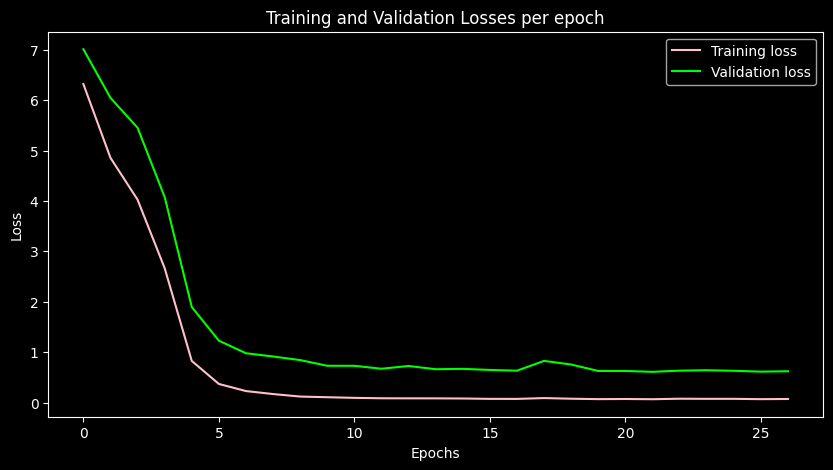

In [7]:
# Call the function
plot_losses(losses_list)

## Testing

In [8]:
test_loss = estimate_loss(model, dataset, config, ['test'])

Evaluation - test:   0%|          | 0/250 [00:00<?, ?it/s]

C:\Users\thiba\.virtualenvs\transformer-LWcVpt7F\Lib\site-packages\torch\utils\checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


In [9]:
print(f"Test loss = {test_loss['test'].item():4f}")

Test loss = 0.863801


## Find specific exemple from overfitted dataset

In [10]:
b = dataset.get_batch('train')
nb = next(b)

In [11]:
nb['inputs']

tensor([[100264,  24901,     11,  ..., 100266, 100266, 100266],
        [100264,  16041,    398,  ..., 100266, 100266, 100266],
        [100264,   1687,  59383,  ..., 100266, 100266, 100266],
        ...,
        [100264,  11458,     11,  ..., 100266, 100266, 100266],
        [100264,    791,   1510,  ..., 100266, 100266, 100266],
        [100264,   3947,   1288,  ..., 100266, 100266, 100266]],
       device='cuda:0')

In [12]:
nb['translation']['en'][0]

'Finally, the report says nothing whatsoever about the deep-rooted economic and social reasons, in particular the rate of unemployment and the worsening poverty among a growing section of the population, that encourage demagogues of the racist and xenophobic extreme right to stir up unrest.'

In [13]:
nb['translation']['fr'][0]

"Enfin, le rapport laisse complètement de côté les raisons économiques et sociales profondes qui facilitent l' agitation des démagogues de l' extrême droite raciste et xénophobe, notamment l' importance du chômage et l' aggravation de la pauvreté pour une fraction croissante de la population."